# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
from sklearn.preprocessing import StandardScaler

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import time
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LinearRegression      # For Linear regression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data Preprocessing

In [2]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")
display(data.head())
print(data.shape)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


(299, 13)


In [3]:
data.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Sex- Gender of patient Male=1,Female=0

Age-Age of patient

Diabetes- 0=No,1=Yes

Anaemia- 0=No,1=Yes

High_blood_pressure- 0=No,1=Yes

Smoking- 0=No,1=Yes

DEATH_EVENT- 0==No,1=Yes

# Is Age and Sex an indicator for Death Event?

In [5]:
# age distribution
hist_data=[data['age'].values]
group_labels=['age']
fig=ff.create_distplot(hist_data,group_labels)
fig.update_layout(title_text='Age Distribution plot')
fig.show()

In [6]:
fig = px.box(data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [7]:
male = data[data["sex"]==1]
female = data[data["sex"]==0]

male_survi = male[data["DEATH_EVENT"]==0]
male_not = male[data["DEATH_EVENT"]==1]
female_survi = female[data["DEATH_EVENT"]==0]
female_not = female[data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[data["DEATH_EVENT"]==0]),len(male[data["DEATH_EVENT"]==1]),
         len(female[data["DEATH_EVENT"]==0]),len(female[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

# Gender Factor Analysis

In [8]:
surv = data[data["DEATH_EVENT"]==0]["age"]
not_surv = data[data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

In [9]:
fig=px.violin(data,y="age",x="sex",color="DEATH_EVENT",box=True,points="all",hover_data=data.columns)

fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()



In [10]:
fig = px.violin(data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

In [11]:
fig = px.violin(data, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

# Other Factors

In [12]:
fig = px.histogram(data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()


In [13]:
fig = px.histogram(data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()

In [14]:
fig = px.histogram(data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()


In [15]:
fig = px.histogram(data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()

In [16]:
fig = px.histogram(data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=data.columns)
fig.show()


# Distribution plots Survived and Not Survived

In [17]:
surv = data[data['DEATH_EVENT']==0]['serum_sodium']
not_surv = data[data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [18]:
surv = data[data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = data[data['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [19]:
surv = data[data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = data[data['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

# Pie Charts

In [20]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = data[data['diabetes']==1]
diabetes_no = data[data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [21]:
fig = px.pie(data, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()


In [22]:
diabetes_yes_survi = diabetes_yes[data["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[data["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[data["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[data["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[data["DEATH_EVENT"]==0]),len(diabetes_yes[data["DEATH_EVENT"]==1]),
         len(diabetes_no[data["DEATH_EVENT"]==0]),len(diabetes_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()


In [23]:
anaemia_yes = data[data['anaemia']==1]
anaemia_no = data[data['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia")
fig.show()

In [24]:
fig = px.pie(data, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration')
fig.show()

In [25]:
anaemia_yes_survi = anaemia_yes[data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[data["DEATH_EVENT"]==0]),len(anaemia_yes[data["DEATH_EVENT"]==1]),
         len(anaemia_no[data["DEATH_EVENT"]==0]),len(anaemia_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

In [26]:
hbp_yes = data[data['high_blood_pressure']==1]
hbp_no = data[data['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

In [27]:
fig = px.pie(data, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [28]:
hbp_yes_survi = hbp_yes[data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[data["DEATH_EVENT"]==0]),len(hbp_yes[data["DEATH_EVENT"]==1]),
         len(hbp_no[data["DEATH_EVENT"]==0]),len(hbp_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()


In [29]:
smoking_yes = data[data['smoking']==1]
smoking_no = data[data['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

In [30]:
fig = px.pie(data, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()

In [31]:
smoking_yes_survi = smoking_yes[data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[data["DEATH_EVENT"]==0]),len(smoking_yes[data["DEATH_EVENT"]==1]),
         len(smoking_no[data["DEATH_EVENT"]==0]),len(smoking_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

# Heatmap

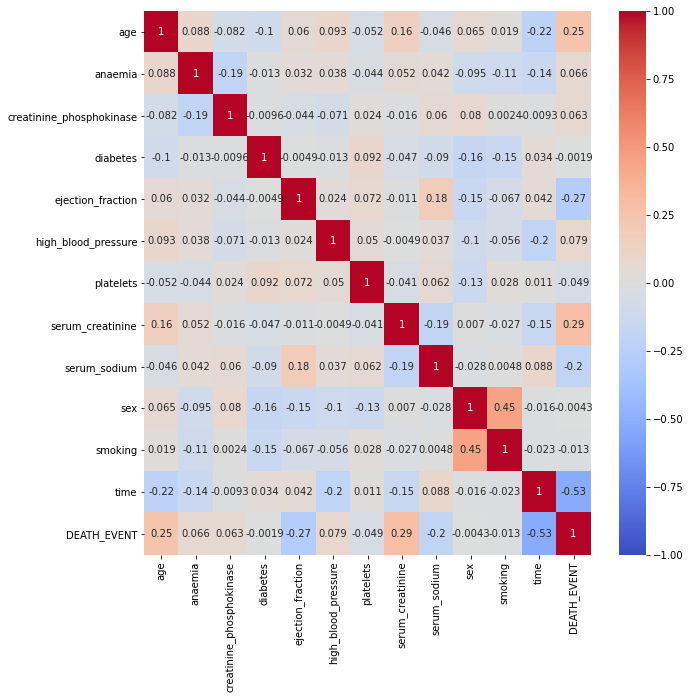

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);

# Data Modeling

In [33]:
Features = ['time','ejection_fraction','serum_creatinine','age']


# Data Standardization

In [34]:

scaler=StandardScaler()
x=scaler.fit_transform(data[Features])
print(x[:4])


[[-1.62950241 -1.53055953  0.49005699  1.19294523]
 [-1.60369074 -0.00707675 -0.28455235 -0.49127928]
 [-1.5907849  -1.53055953 -0.09090002  0.35083298]
 [-1.5907849  -1.53055953  0.49005699 -0.9123354 ]]


In [35]:
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=23346)

In [36]:
Rsqaure_list = []


In [37]:
computational_list=[]

In [38]:
# XGB Regressor

xg_reg = XGBRegressor()
start_time = time.time()
xg_reg.fit(x_train, y_train)
elapsed_time = time.time() - start_time

xg_pred =xg_reg.predict(x_test)
xg_acc = metrics.r2_score(y_test, xg_pred)
Rsqaure_list.append(100*xg_acc)
computational_list.append(100*elapsed_time)

In [39]:
RMSE_list=[]

In [40]:
print(Fore.GREEN + "R^2 of XGB Regressorr is : ", "{:.2f}%".format(100* xg_acc))
print(Fore.RED+"Computational Complexity of XGB Regressor:","{:.2f}sec".format(100*elapsed_time))

R^2 of XGB Regressorr is :  42.64%
Computational Complexity of XGB Regressor: 116.97sec


In [41]:
y_pred = xg_reg.predict(x_train)
xg_rmse=np.sqrt(metrics.mean_squared_error(y_train, y_pred))
RMSE_list.append(xg_rmse)
print('RMSE of Xg_boost:',xg_rmse)

RMSE of Xg_boost: 0.0021221077502440104


In [42]:
# Create a Linear regressor
lm = LinearRegression()
start_time=time.time()
lm.fit(x_train, y_train)
elapsed_time=time.time()-start_time
lm_pred = lm.predict(x_test)
lm_acc = metrics.r2_score(y_test, lm_pred)
Rsqaure_list.append(100*lm_acc)
computational_list.append(100*elapsed_time)

In [43]:
print(Fore.GREEN + " R^2 of Linear Regression is : ", "{:.2f}%".format(100* lm_acc))
print(Fore.RED+"Computational Complexity of Linear Regression:","{:.2f}".format(100*elapsed_time))

 R^2 of Linear Regression is :  37.12%
Computational Complexity of Linear Regression: 0.90


In [44]:
y_pred = lm.predict(x_train)
lm_rmse=np.sqrt(metrics.mean_squared_error(y_train, y_pred))
RMSE_list.append(lm_rmse)
print('RMSE of Linear Regression:',lm_rmse)

RMSE of Linear Regression: 0.3677271790634706


In [45]:

# Create a Random Forest Regressor
reg = RandomForestRegressor()

start_time=time.time()
reg.fit(x_train, y_train)
elapsed_time=time.time()-start_time

reg_pred = reg.predict(x_test)
reg_acc = metrics.r2_score(y_test, reg_pred)
Rsqaure_list.append(100*reg_acc)
computational_list.append(100*elapsed_time)

In [46]:
print(Fore.GREEN + "R^2 of Random Forest Regressor is : ", "{:.2f}%".format(100* reg_acc))
print(Fore.RED+"Computational Complexity of Random Forest Regressor:","{:.2f}".format(100*elapsed_time))

R^2 of Random Forest Regressor is :  57.71%
Computational Complexity of Random Forest Regressor: 60.40


In [47]:
y_pred = reg.predict(x_train)
reg_rmse=np.sqrt(metrics.mean_squared_error(y_train, y_pred))
RMSE_list.append(reg_rmse)
print('RMSE of Random Forest Regressor:',reg_rmse)

RMSE of Random Forest Regressor: 0.1393799779117425


In [48]:
svr_reg=SVR(kernel='rbf')
start_time=time.time()
svr_reg.fit(x_train, y_train)
elapsed_time=time.time()-start_time

svr_pred = svr_reg.predict(x_test)
svr_acc = metrics.r2_score(y_test, svr_pred)
Rsqaure_list.append(100*svr_acc)
computational_list.append(100*elapsed_time)

In [49]:
print(Fore.GREEN + "R^2  of Support Vector Regressor is : ", "{:.2f}%".format(100* svr_acc))
print(Fore.RED+"Computational Complexity of Support Vector Regressor:","{:.2f}".format(100*elapsed_time))

R^2  of Support Vector Regressor is :  46.88%
Computational Complexity of Support Vector Regressor: 1.20


In [50]:
svr_pred = svr_reg.predict(x_train)
svr_rmse=np.sqrt(metrics.mean_squared_error(y_train, svr_pred))
RMSE_list.append(svr_rmse)
print('RMSE of Support Vector Regressor:',svr_rmse)

RMSE of Support Vector Regressor: 0.3096985169801722


In [51]:
model_list = ['XGBRegressor', 'LinearRegression', 'RandomForestRegressor','SupportVectorRegressor'  ]

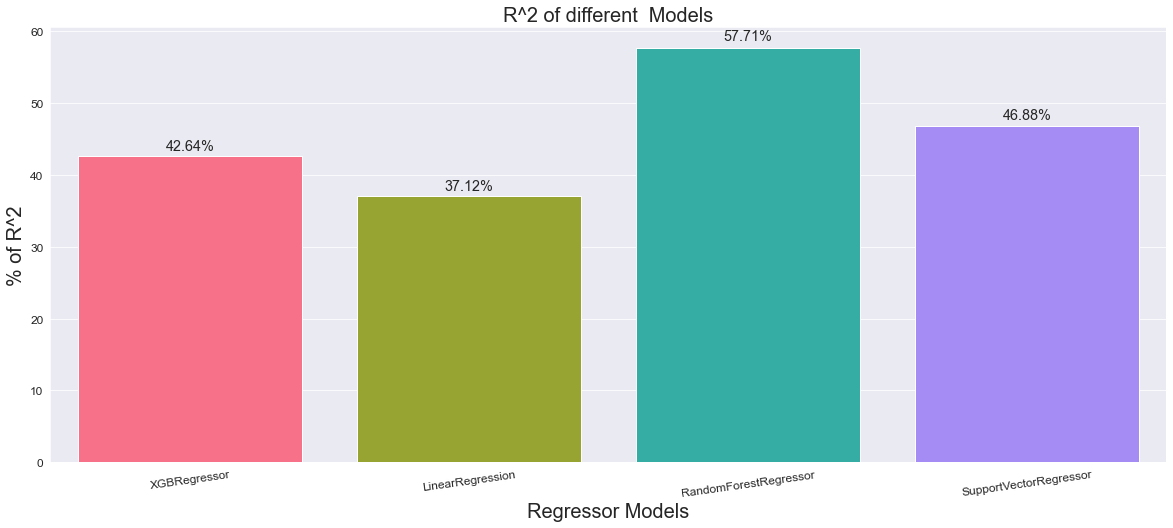

In [52]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=Rsqaure_list, palette = "husl", saturation =2.0)
plt.xlabel('Regressor Models', fontsize = 20 )
plt.ylabel('% of R^2', fontsize = 20)
plt.title('R^2 of different  Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

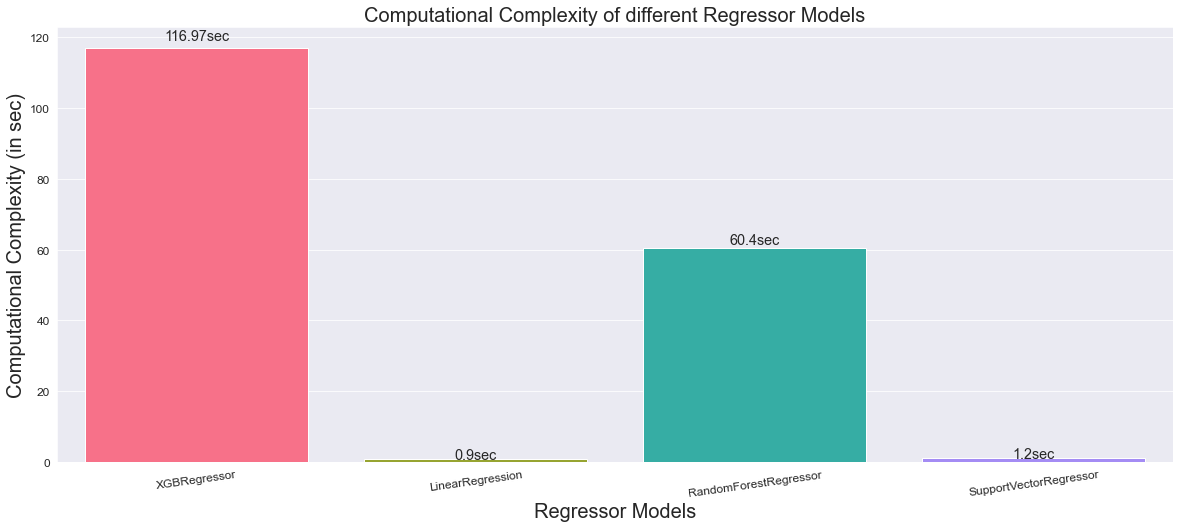

In [53]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=computational_list, palette = "husl", saturation =2.0)
plt.xlabel('Regressor Models', fontsize = 20 )
plt.ylabel('Computational Complexity (in sec)', fontsize = 20)
plt.title('Computational Complexity of different Regressor Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}sec', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

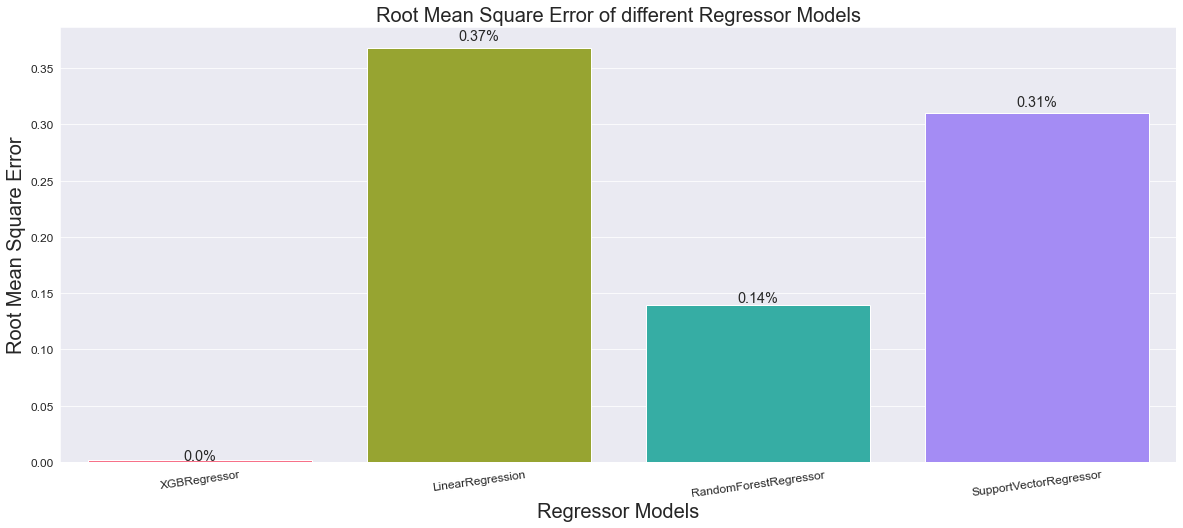

In [54]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=RMSE_list, palette = "husl", saturation =2.0)
plt.xlabel('Regressor Models', fontsize = 20 )
plt.ylabel('Root Mean Square Error', fontsize = 20)
plt.title('Root Mean Square Error of different Regressor Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Classification Models

In [55]:
accuracy_list=[]

In [56]:
computational_list_cla=[]

In [57]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
start_time = time.time()
kn_clf.fit(x_train, y_train)
elapsed_time = time.time() - start_time

kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
computational_list_cla.append(100*elapsed_time)

In [58]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))
print(Fore.RED+"Computational Complexity of KNeighbors Classifier:","{:.2f}".format(100*elapsed_time))


Accuracy of K Neighbors Classifier is :  90.00%
Computational Complexity of KNeighbors Classifier: 0.31


In [59]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
start_time=time.time()
dt_clf.fit(x_train, y_train)
elapsed_time=time.time()-start_time
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
computational_list_cla.append(100*elapsed_time)

In [60]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print(Fore.RED+"Computational Complexity of Decision Tree Classifier:","{:.2f}".format(100*elapsed_time))

Accuracy of Decision Tree Classifier is :  80.00%
Computational Complexity of Decision Tree Classifier: 0.36


In [61]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print(Fore.RED+"Computational Complexity of Decision Tree Classifier:","{:.2f}".format(100*elapsed_time))

Accuracy of Decision Tree Classifier is :  80.00%
Computational Complexity of Decision Tree Classifier: 0.36


In [62]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
start_time=time.time()
r_clf.fit(x_train, y_train)
elapsed_time=time.time()-start_time

r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
computational_list_cla.append(100*elapsed_time)

In [63]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))
print(Fore.RED+"Computational Complexity of Random Forest Classifier:","{:.2f}".format(100*elapsed_time))

Accuracy of Random Forest Classifier is :  90.00%
Computational Complexity of Random Forest Classifier: 51.56


In [64]:
model_list = ['KNearestNeighbours', 'DecisionTree', 'RandomForest'  ]

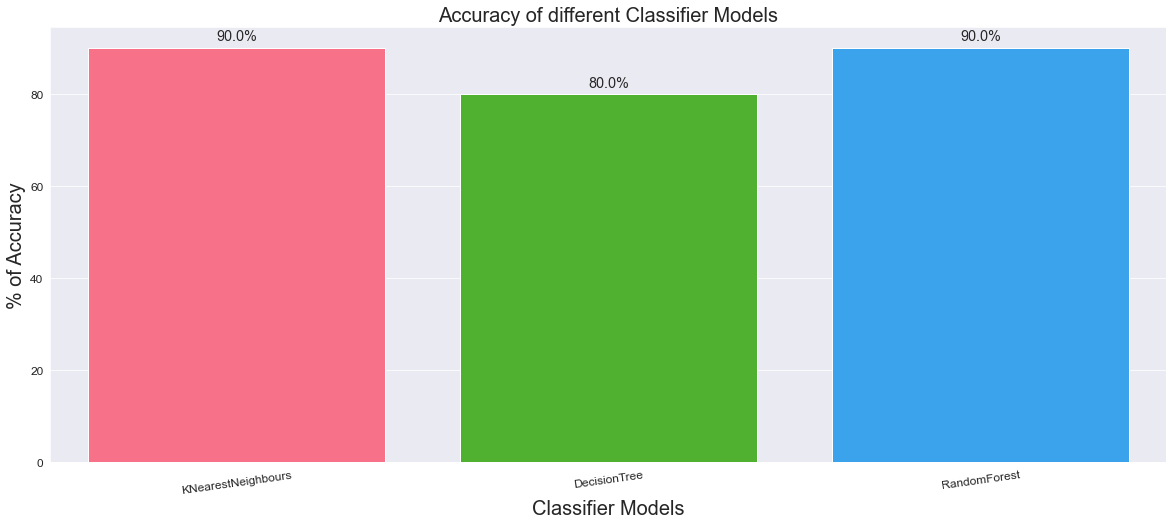

In [65]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

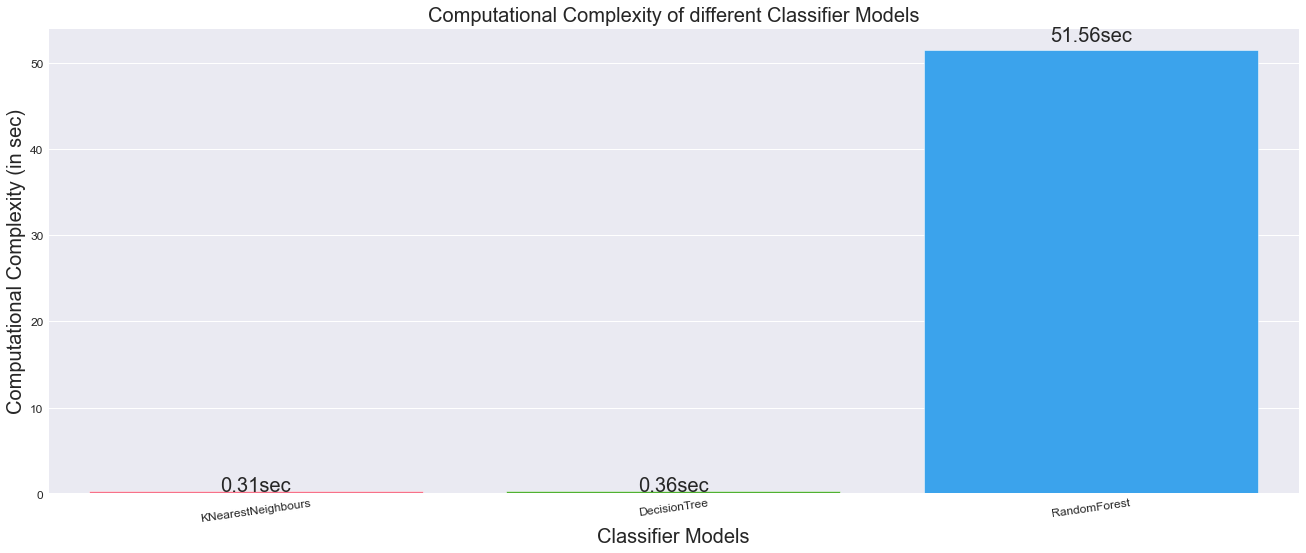

In [80]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=computational_list_cla, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Computational Complexity (in sec)', fontsize = 20)
plt.title('Computational Complexity of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}sec', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# K-Means Clustering

In [81]:
from sklearn.cluster import KMeans
scaler=StandardScaler()
x=scaler.fit_transform(data[Features])


kmeans=KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
scaled_features=x[:7,:3]
print(scaled_features)


[[-1.62950241 -1.53055953  0.49005699]
 [-1.60369074 -0.00707675 -0.28455235]
 [-1.5907849  -1.53055953 -0.09090002]
 [-1.5907849  -1.53055953  0.49005699]
 [-1.57787906 -1.53055953  1.26466633]
 [-1.57787906  0.16219911  0.68370932]
 [-1.55206738 -1.95374919 -0.18772618]]


In [82]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [83]:
#the Lowest sum sqaured error(SSE) value
kmeans.inertia_

0.49643853272079763

In [84]:
#find locations of the centroid
kmeans.cluster_centers_

array([[-1.57787906,  0.16219911,  0.68370932],
       [-1.59938879, -1.53055953,  0.7482601 ],
       [-1.57142614, -1.74215436, -0.1393131 ],
       [-1.60369074, -0.00707675, -0.28455235]])

In [85]:
#The number of iterations required to converge
kmeans.n_iter_

2

In [86]:
kmeans.labels_[:5]

array([1, 3, 2, 1, 1])

# Choosing the Appropriate Number of Clusters

In [87]:
Kmeans_kwargs={"init":"random","n_init":10,"max_iter":300,"random_state":42}

#List hold the SSE values for each K
sse=[]
for k in range(1,6):
    kmeans=KMeans(n_clusters=k,**Kmeans_kwargs)# Python dictionary unpacking operator(**).powerful operrator to iterate theough the dictionRY
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

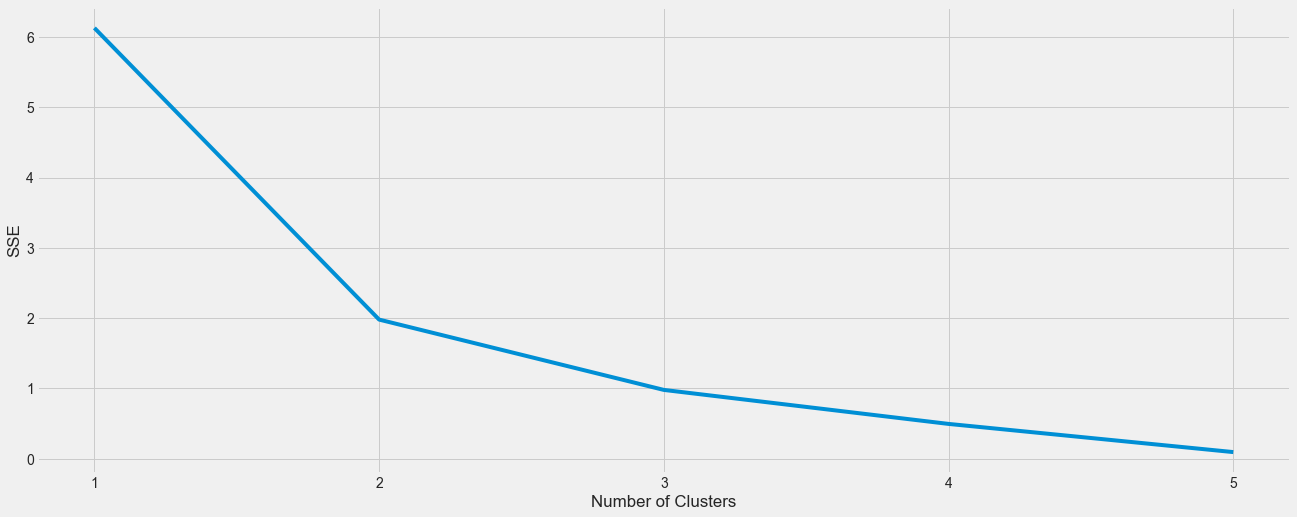

In [88]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,6),sse)
plt.xticks(range(1,6))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [89]:
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,adjusted_rand_score
k1=KneeLocator(range(1,6),sse,curve="convex",direction="decreasing")
k1.elbow

2

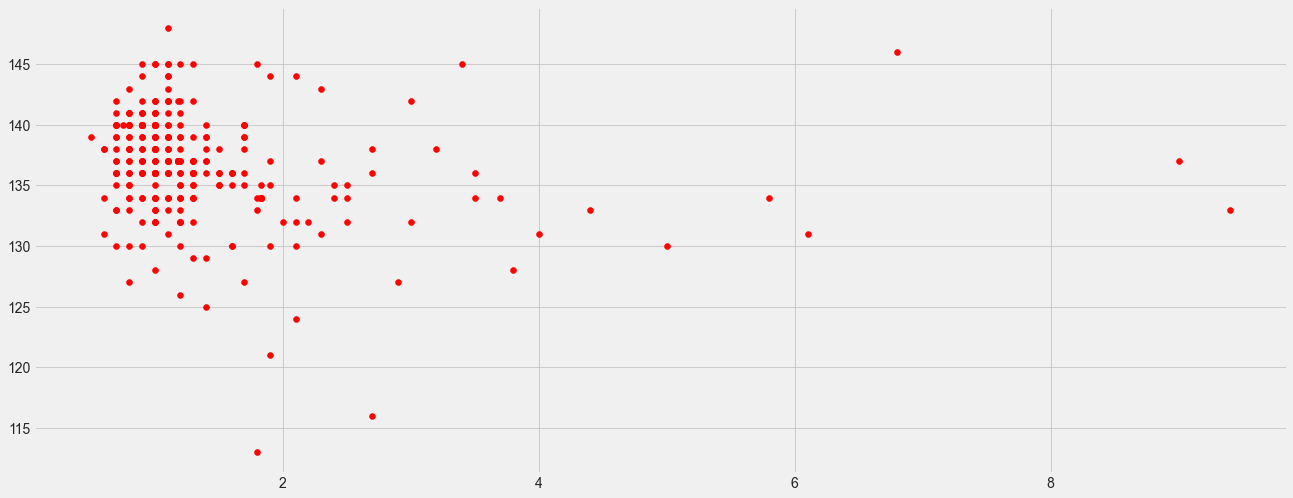

In [90]:
Y=data["serum_sodium"]
X=data["serum_creatinine"]
X1=np.array(list(zip(Y,X)))
plt.scatter(X,Y, c='red')

In [91]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(Y)-135, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(Y)-135, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[7. 9.]
 [1. 7.]]


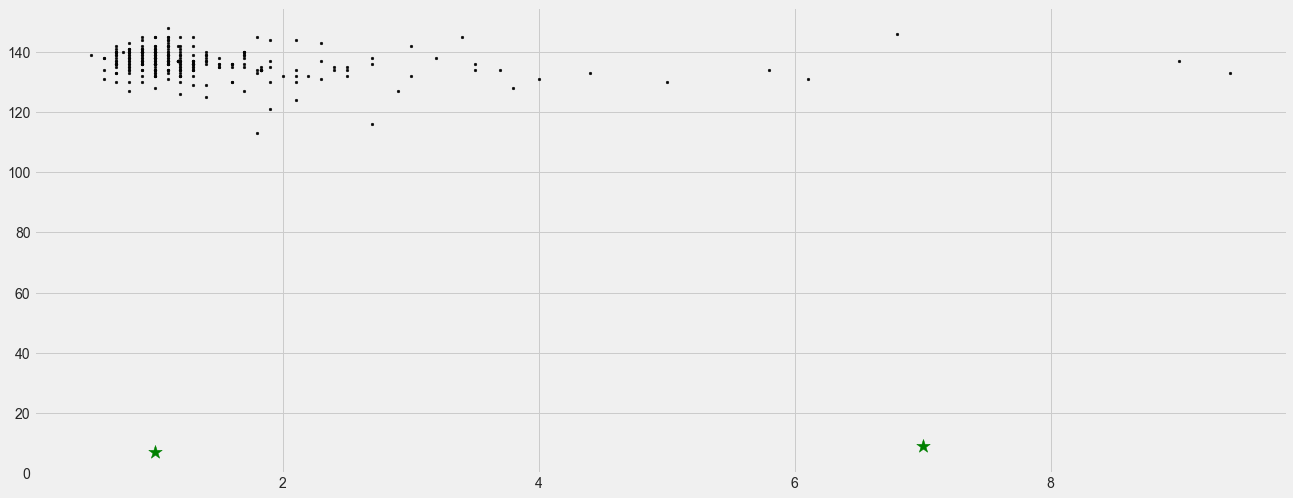

In [92]:
# Plotting along with the Centroids
plt.scatter(X, Y, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
